# Advanced data analysis: group project

By delivering this notebook, we confirm that the code presented was developed by the following students.

## Student 1: Patrícia Fonseca, 53004
## Student 2: Rodrigo Simões, 53154


In the solutions for exercises 1 to 5 you should include necessarily one solution using Pandas/scikit learn and one using Spark.

Some useful links:
* [ACM DEBS 2015 Grand Challenge](http://www.debs2015.org/call-grand-challenge.html)

* [Pandas documentations](https://pandas.pydata.org/docs/)

* [scikit-learn](https://scikit-learn.org/stable/)

* [Spark web site](https://spark.apache.org/)

* [Spark MLlib main page](https://spark.apache.org/mllib/)
* [Spark MLlib guide](https://spark.apache.org/docs/latest/ml-guide.html)

* [Spark GraphX main page](https://spark.apache.org/graphx/)
* [Spark GraphFrames main page](https://graphframes.github.io/graphframes/docs/_site/index.html)
* [Spark GraphFrames User Guide](https://graphframes.github.io/graphframes/docs/_site/user-guide.html)

Run the following cell just to check if it is running in COLAB.

In [ ]:
import sys
import os

IN_COLAB = 'google.colab' in sys.modules

## Install software

The following cell will install Spark, if the notebook is running on COLAB. 

Before running this cell, you should access the following link [https://drive.google.com/drive/folders/1rPCvd5F-uAoWtMYxvMvRyvL-F_1ihmQ-?usp=sharing](https://drive.google.com/drive/folders/1rPCvd5F-uAoWtMYxvMvRyvL-F_1ihmQ-?usp=sharing) and "Add Shortcut to Drive".


In [ ]:
# Install needed software
# Run this cell once before running the other cells in the notebook
if IN_COLAB:
    !apt-get install openjdk-11-jdk-headless
    !pip install pyspark    

!pip install gdown
!mkdir checkpoint


Reading package lists... Done
Building dependency tree       
Reading state information... Done
openjdk-11-jdk-headless is already the newest version (11.0.17+8-1ubuntu2~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 57 kB/s 
     |████████████████████████████████| 199 kB 79.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=a64e910f3609d5991ebf79ac746b51f3738fc482f15ccb65bf1056aeefc0d477
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
!wget https://repos.spark-packages.org/graphframes/graphframes/0.8.2-spark3.2-s_2.12/graphframes-0.8.2-spark3.2-s_2.12.jar
os.environ['PYSPARK_SUBMIT_ARGS'] = '--jars graphframes-0.8.2-spark3.2-s_2.12.jar pyspark-shell'


--2022-12-04 12:29:40--  https://repos.spark-packages.org/graphframes/graphframes/0.8.2-spark3.2-s_2.12/graphframes-0.8.2-spark3.2-s_2.12.jar
Resolving repos.spark-packages.org (repos.spark-packages.org)... 52.85.151.57, 52.85.151.46, 52.85.151.5, ...
Connecting to repos.spark-packages.org (repos.spark-packages.org)|52.85.151.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 247880 (242K) [binary/octet-stream]
Saving to: ‘graphframes-0.8.2-spark3.2-s_2.12.jar’

graphframes-0.8.2-s 100%[===================>] 242.07K  --.-KB/s    in 0.005s  

2022-12-04 12:29:40 (46.5 MB/s) - ‘graphframes-0.8.2-spark3.2-s_2.12.jar’ saved [247880/247880]



## Setup Data

The first time you run the notebook, before running this cell, you should access the following link https://drive.google.com/drive/folders/1rPCvd5F-uAoWtMYxvMvRyvL-F_1ihmQ-?usp=sharing and select the "Add Shortcut to Drive". This will add a shortcut to the datasets to your Google Drive.

The following cell will mount the directory into Colab environment, so that it can be accessed as a local file.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Select the dataset you want to use by uncommnting the appropriate line and running this cell

#Small dataset 100K lines
#FILENAME="/content/drive/MyDrive/group2223/tiny.csv"

#Default dataset 2M lines
FILENAME="/content/drive/MyDrive/group2223/sample.csv"

#Huge dataset 173M lines - use only in exercise 0
#FILENAME="/content/drive/MyDrive/group2223/sorted_data.csv"



### Alternative way to access data

Alternatively you can access data by downloading the data into the colab running environment. The following sets download different datasets - download the one you need.

Run the following cell to download a **tiny** dataset. You can download it to you computer using this URL: https://drive.google.com/file/d/12urSB0j_bMKhGcX3JReMEnyJ6sBNlJvZ



In [ ]:
!gdown 12urSB0j_bMKhGcX3JReMEnyJ6sBNlJvZ
!unzip -u tiny.csv.zip
!rm tiny.csv.zip
FILENAME="tiny.csv"


Downloading...
From: https://drive.google.com/uc?id=12urSB0j_bMKhGcX3JReMEnyJ6sBNlJvZ
To: /content/tiny.csv.zip
100% 6.87M/6.87M [00:00<00:00, 262MB/s]
Archive:  tiny.csv.zip
  inflating: tiny.csv                


Alternatively, run the following cell to download the **default** dataset. You can download the file to your computer using this URL: 
https://drive.google.com/file/d/1sUVxmBiKBalWOVwEf2lcm1xVHRQK1t_A

In [ ]:
"""!gdown 1sUVxmBiKBalWOVwEf2lcm1xVHRQK1t_A
!unzip -u sample.csv.zip
!rm sample.csv.zip
FILENAME='sample.csv' """


"!gdown 1sUVxmBiKBalWOVwEf2lcm1xVHRQK1t_A\n!unzip -u sample.csv.zip\n!rm sample.csv.zip\nFILENAME='sample.csv' "

You can still run the following cell (this will take some time) to download a **huge** dataset - with 33GB !!! You can download the file to you computer using this URL: https://drive.google.com/file/d/1YmCNSZzLTXqPVVWG8D6uVRjPMtkcnTt5/view?usp=share_link

Use this dataset **only** for computing the result of exercise 0.

In [ ]:
"""!gdown 1YmCNSZzLTXqPVVWG8D6uVRjPMtkcnTt5
!unzip -u sorted_data.csv.zip
!rm sorted_data.csv.zip
FILENAME='sorted_data.csv' """


"!gdown 1YmCNSZzLTXqPVVWG8D6uVRjPMtkcnTt5\n!unzip -u sorted_data.csv.zip\n!rm sorted_data.csv.zip\nFILENAME='sorted_data.csv' "

## Initialization

import libraries.

In [ ]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyspark
import pyspark.pandas as ps
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.ml.linalg import Vectors
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import *
from pyspark.ml.feature import *
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

plt.style.use('seaborn')


Let's start spark session and set *log* level to ERROR.

In [ ]:
spark = SparkSession.builder \
    .master("local") \
    .appName("Group project") \
    .config("spark.sql.execution.arrow.pyspark.enabled", "true") \
    .config("spark.driver.memory", "12g") \
    .getOrCreate()

if IN_COLAB : 
    spark.sparkContext.addPyFile('graphframes-0.8.2-spark3.2-s_2.12.jar')
else:
    spark.sparkContext.addPyFile('/usr/local/spark/jars/graphframes-0.8.2-spark3.2-s_2.12.jar')

spark.sparkContext.setCheckpointDir("checkpoint")


## Simple statistics

First program prints simple statistics.

In [ ]:
spark = SparkSession \
    .builder \
    .master("local[*]") \
    .appName("Group project") \
    .getOrCreate()

mySchema = StructType([
    StructField("medallion", StringType()),
    StructField("hack_license", StringType()),
    StructField("pickup_datetime", TimestampType()),
    StructField("dropoff_datetime", TimestampType()),
    StructField("trip_time_in_secs", IntegerType()),
    StructField("trip_distance", DoubleType()),
    StructField("pickup_longitude", DoubleType()),
    StructField("pickup_latitude", DoubleType()),
    StructField("dropoff_longitude", DoubleType()),
    StructField("dropoff_latitude", DoubleType()),
    StructField("payment_type", StringType()),
    StructField("fare_amount", DoubleType()),
    StructField("surcharge", DoubleType()),
    StructField("mta_tax", DoubleType()),
    StructField("tip_amount", DoubleType()),
    StructField("tolls_amount", DoubleType()),
    StructField("total_amount", DoubleType()),
])

dataset = spark.read.load(FILENAME, format="csv", 
                         sep=",", schema=mySchema, header="false")
dataset.createOrReplaceTempView("data")

statistics = spark.sql( """SELECT COUNT( DISTINCT medallion) AS num_medallion, 
                                  COUNT( DISTINCT hack_license) AS num_license,
                                  MIN( pickup_datetime) AS min_pickup,
                                  MAX( dropoff_datetime) AS max_dropoff,
                                  MAX( trip_time_in_secs) AS max_trip_time,
                                  MAX( trip_distance) AS max_trip_distance,
                                  MAX( total_amount) AS max_total_amount
                                  FROM data""")
statistics.show()


+-------------+-----------+-------------------+-------------------+-------------+-----------------+----------------+
|num_medallion|num_license|         min_pickup|        max_dropoff|max_trip_time|max_trip_distance|max_total_amount|
+-------------+-----------+-------------------+-------------------+-------------+-----------------+----------------+
|        10867|      20354|2013-01-01 00:00:00|2013-01-21 00:11:45|        10800|            95.85|           465.0|
+-------------+-----------+-------------------+-------------------+-------------+-----------------+----------------+



## Ploting information

Example on how to plot information using matplotlib.

### First plot

This first plot helps showing that data has several invalid values.

Let's plot the pickups - you can see that there are points quite far from the expected locations. 

Plotting pickups


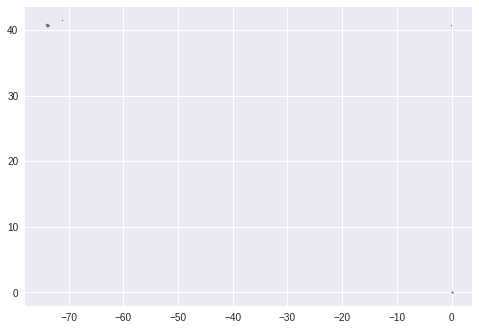

In [ ]:
spark = SparkSession \
    .builder \
    .master("local[*]") \
    .appName("Group project") \
    .getOrCreate()

mySchema = StructType([
    StructField("medallion", StringType()),
    StructField("hack_license", StringType()),
    StructField("pickup_datetime", TimestampType()),
    StructField("dropoff_datetime", TimestampType()),
    StructField("trip_time_in_secs", IntegerType()),
    StructField("trip_distance", DoubleType()),
    StructField("pickup_longitude", DoubleType()),
    StructField("pickup_latitude", DoubleType()),
    StructField("dropoff_longitude", DoubleType()),
    StructField("dropoff_latitude", DoubleType()),
    StructField("payment_type", StringType()),
    StructField("fare_amount", DoubleType()),
    StructField("surcharge", DoubleType()),
    StructField("mta_tax", DoubleType()),
    StructField("tip_amount", DoubleType()),
    StructField("tolls_amount", DoubleType()),
    StructField("total_amount", DoubleType()),
])

dataset = spark.read.load(FILENAME, format="csv", 
                         sep=",", schema=mySchema, header="false")
dataset.createOrReplaceTempView("data")

# Plotting all points is probably too much in many computers, so lets plot only a few 1000's
data = spark.sql( "SELECT * FROM data LIMIT 1000")
pickups = data.collect()

print('Plotting pickups')
plt.scatter([row.pickup_longitude for row in pickups],
            [row.pickup_latitude for row in pickups],
            s=1)
plt.show()


### Plotting heatamps

This example shows how to **plot heatmaps** and how to **create a grid** with coordinates -- note that we need to group nearby coordinates together or (almost) every coordinate will be unique.

The example creates a grid, with cell of 150m of side (commented out the code for cells of 500m of side). It also filters out data that is outside of the area of interest - defined by northLatitude, southLatitude, westLatitude, eastLatitude coordinates.

\[From ACM DEBS 2015 Grand Challenge page\]

**Question 1**: Is the earth flat or how to map coordinates to cells?

**Answer**: For the challenge we allow a simplified flat earth assumption for mapping coordinates to cells in the queries. You can assume that a distance of 500 meter south corresponds to a change of 0.004491556 degrees in the coordinate system. For moving 500 meter east you can assume a change of 0.005986 degrees in the coordinate system.

Plotting pickups


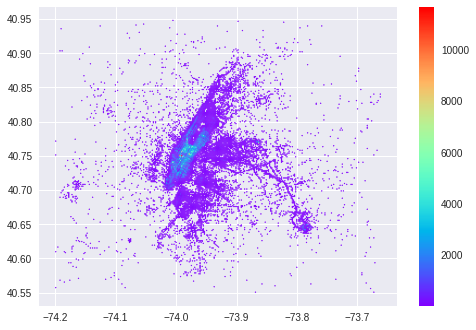

Plotting dropoffs


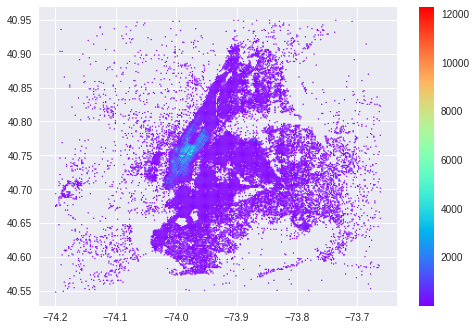

In [ ]:
spark = SparkSession \
    .builder \
    .master("local[*]") \
    .appName("Group project") \
    .getOrCreate()

# Squares of 500 meters
#latitudeStep = 0.004491556
#longitudeStep = 0.005986
#northLatitude = 41.474937 - 0.5 * latitudeStep
#southLatitude = northLatitude - 300 * latitudeStep
#eastLongitude = -74.913585 - 0.5 * longitudeStep
#westLongitude = eastLongitude + 300 * longitudeStep

# Squares of 150 meters
latitudeStep = 0.0013474668
longitudeStep = 0.0017958
northLatitude = 40.95
southLatitude = northLatitude - 300 * latitudeStep
eastLongitude = -74.2
westLongitude = eastLongitude + 300 * longitudeStep

# function to round longitude to a point in the middle of the square
def longiRound( val):
    return ((val - eastLongitude) // longitudeStep) * longitudeStep + eastLongitude + longitudeStep / 2
spark.udf.register("longround", longiRound, DoubleType())

# function to round latitude to a point in the middle of the square
def latRound( l):
    return northLatitude - ((northLatitude - l) // latitudeStep) * latitudeStep - latitudeStep / 2
spark.udf.register("latround", latRound, DoubleType())

mySchema = StructType([
    StructField("medallion", StringType()),
    StructField("hack_license", StringType()),
    StructField("pickup_datetime", TimestampType()),
    StructField("dropoff_datetime", TimestampType()),
    StructField("trip_time_in_secs", IntegerType()),
    StructField("trip_distance", DoubleType()),
    StructField("pickup_longitude", DoubleType()),
    StructField("pickup_latitude", DoubleType()),
    StructField("dropoff_longitude", DoubleType()),
    StructField("dropoff_latitude", DoubleType()),
    StructField("payment_type", StringType()),
    StructField("fare_amount", DoubleType()),
    StructField("surcharge", DoubleType()),
    StructField("mta_tax", DoubleType()),
    StructField("tip_amount", DoubleType()),
    StructField("tolls_amount", DoubleType()),
    StructField("total_amount", DoubleType()),
])


dataset = spark.read.load(FILENAME, format="csv", 
                         sep=",", schema=mySchema, header="false")

# Let's filter data outside of the box and build a grid
# Points in each square are mapped to the center of the square.
dataset.createOrReplaceTempView("data")
filteredDataDF = spark.sql( """SELECT medallion, hack_license, pickup_datetime,
                                    dropoff_datetime, trip_time_in_secs, trip_distance,
                                    longround(pickup_longitude) AS pickup_longitude, 
                                    latround(pickup_latitude) AS pickup_latitude,
                                    longround(dropoff_longitude) AS dropoff_longitude, 
                                    latround(dropoff_latitude) AS dropoff_latitude, 
                                    payment_type, fare_amount, mta_tax, 
                                    tip_amount, tolls_amount, total_amount
                                  FROM data
                                  WHERE pickup_longitude >= """ + str(eastLongitude) + """ AND
                                  pickup_longitude <=  """ + str(westLongitude) + """ AND
                                  dropoff_longitude >=  """ + str(eastLongitude) + """ AND
                                  dropoff_longitude <=  """ + str(westLongitude) + """ AND
                                  pickup_latitude <= """ + str(northLatitude) + """ AND
                                  pickup_latitude >= """ + str(southLatitude) + """ AND
                                  dropoff_latitude <=  """ + str(northLatitude) + """ AND
                                  dropoff_latitude >=  """ + str(southLatitude))
filteredDataDF.createOrReplaceTempView("data")

# Frequency for pickups
pickupsDF = spark.sql( """SELECT pickup_longitude, pickup_latitude, count(*) AS cnt
                                  FROM data
                                  GROUP BY pickup_longitude, pickup_latitude""")
pickups = pickupsDF.collect()

print('Plotting pickups')
p = plt.scatter([row.pickup_longitude for row in pickups],
            [row.pickup_latitude for row in pickups],
            c=[row.cnt for row in pickups],s=1,cmap="rainbow")
plt.colorbar(p)
plt.show()

# Statistics for dropoffs
dropoffsDF = spark.sql( """SELECT dropoff_longitude, dropoff_latitude, count(*) AS cnt
                                  FROM data
                                  GROUP BY dropoff_longitude, dropoff_latitude""")
dropoffs = dropoffsDF.collect()

print('Plotting dropoffs')
p = plt.scatter([row.dropoff_longitude for row in dropoffs],
            [row.dropoff_latitude for row in dropoffs],
            c=[row.cnt for row in dropoffs],s=1,cmap="rainbow")
plt.colorbar(p)
plt.show()



## Exercise 0: another simple statistics

This example computes, for each license, the number of trips performed.

We have the code using Spark and Pandas, printing the time for doing the computation.
**Draw some conclusions** by comparing the time for performing the computation using Spark and Pandas, and also when using the different datasets - **Make sure you run each cell more than once and write down the last value**.

### Code: Spark

In [ ]:
spark = SparkSession \
    .builder \
    .master("local[*]") \
    .appName("Group project") \
    .getOrCreate()

start_time = time.time()
mySchema = StructType([
    StructField("medallion", StringType()),
    StructField("hack_license", StringType()),
    StructField("pickup_datetime", TimestampType()),
    StructField("dropoff_datetime", TimestampType()),
    StructField("trip_time_in_secs", IntegerType()),
    StructField("trip_distance", DoubleType()),
    StructField("pickup_longitude", DoubleType()),
    StructField("pickup_latitude", DoubleType()),
    StructField("dropoff_longitude", DoubleType()),
    StructField("dropoff_latitude", DoubleType()),
    StructField("payment_type", StringType()),
    StructField("fare_amount", DoubleType()),
    StructField("surcharge", DoubleType()),
    StructField("mta_tax", DoubleType()),
    StructField("tip_amount", DoubleType()),
    StructField("tolls_amount", DoubleType()),
    StructField("total_amount", DoubleType()),
])

dataset = spark.read.load(FILENAME, format="csv", 
                         sep=",", schema=mySchema, header="false")
dataset.createOrReplaceTempView("data")
statistics = spark.sql( """SELECT hack_license, COUNT(*) AS cnt FROM data GROUP BY hack_license""")
statistics.show()

end_time = time.time()

print( "Runtime = " + str(end_time - start_time))


+--------------------+---+
|        hack_license|cnt|
+--------------------+---+
|130328475AD7427AF...|125|
|D4F2AE0988ECB2E42...|190|
|DD97899ACAC51EF31...| 27|
|A7C47E60941315A0E...|224|
|9911D66A4A796752D...|148|
|88CB7A1006DB18438...|129|
|069B5562096AF7684...|129|
|28A7C858D9231A3EC...|148|
|A7EE9AEDB7325F55F...|185|
|4B6EFCBC110DB539E...|113|
|AA33AA1CACC8C26E7...|177|
|921E1C7C91CDCF1C6...| 78|
|616E057B1ACDB7B28...|162|
|EFA12B2F45FC838E1...|153|
|D0D1271283601BF84...|199|
|138B0A7B7D3B898E4...|134|
|0FBF11956EE14B253...|155|
|8821CA9250E34A869...|141|
|BE047851D97506885...|  7|
|02856AFC22881ABCA...|186|
+--------------------+---+
only showing top 20 rows

Runtime = 6.507218837738037


### Results (Spark)

**Tiny dataset**

The time to process the dataset was : **2,36** seconds.

**Default dataset**

The time to process the dataset was : **10,64** seconds.

**Large dataset**

The time to process the dataset was : **584.82** seconds.

### Code: Pandas library

In [ ]:
start_time = time.time()
mySchema = ["medallion", "hack_license", "pickup_datetime",
            "dropoff_datetime", "trip_time_in_secs", "trip_distance",
            "pickup_longitude", "pickup_latitude", "dropoff_longitude",
            "dropoff_latitude", "payment_type", "fare_amount", 
            "surcharge", "mta_tax", "tip_amount",
            "tolls_amount", "total_amount"]

dataset = pd.read_csv(FILENAME,names=mySchema)
result = dataset.groupby("hack_license").count()
print(result)

end_time = time.time()

print( "Runtime = " + str(end_time - start_time))


                                  medallion  pickup_datetime  \
hack_license                                                   
0008B3E338CE8C3377E071A4D80D3694        129              129   
000B8D660A329BBDBF888500E4BD8B98          2                2   
000CCA239BFDC0ABE2895AC9086C4290         11               11   
00184958F5D5FD0A9EC0B115C5B55796         62               62   
001C8AAB90AEE49F36FCAA7B4136C81A        178              178   
...                                     ...              ...   
FFF5AD65C673251C1F275CF5B43EC414          2                2   
FFF6401CC16911710E7590FE197E986A         33               33   
FFF657CFEC6A06384C97ACB500916913         68               68   
FFF909B1353148850AD3E40BB878618B        124              124   
FFFBCEA3D4E21E05902EE67AD556F67C        177              177   

                                  dropoff_datetime  trip_time_in_secs  \
hack_license                                                            
0008B3E338CE8C3377E07

### Results (Pandas)

**Tiny dataset**

The time to process the dataset was : **0,55** seconds.

**Default dataset**

The time to process the dataset was : **8,15** seconds.

**Large dataset**

The time to process the dataset was : it crashed during processing.

#### Results discussion

The results show that while the processing time for the tiny and default dataset was lower using Pandas, processing the large dataset was only possible using Spark. 
The difference between Pandas and Spark is that while Pandas run operations in a single machine, Spark runs on multiple machines at the same time. Actually, that's the reason why processing the large dataset crashed when using Pandas - the dataset has such an enourmous dimension that it can't be processed in a single machine, and needs instead to resort to multiple machines. 
This leads us to the conclusion that Pandas is a better fit for running smaller datasets, because there is not the need to run them on several machines (and that can actually be inefficient, as we can see in the processing times of Spark when compared to Pandas) , whereas Spark works better for larger datasets since those need more capacity to be ran. 

## Exercise 1

Let's start by trying to help the city to identify which new bus routes should be introduced. To this end, you should find the most frequent routes whose distance is above a given treshold (defined by you).

For establishing these routes, we suggest that you use a grid of 500m of side.

In [ ]:
# Creating a grid composed by squares of 500 meters

latitudeStep = 0.004491556
longitudeStep = 0.005986
northLatitude = 41.474937 - 0.5 * latitudeStep
southLatitude = northLatitude - 300 * latitudeStep
eastLongitude = -74.913585 - 0.5 * longitudeStep
westLongitude = eastLongitude + 300 * longitudeStep

# function to round longitude to a point in the middle of the square
def longiRound( val):
    return ((val - eastLongitude) // longitudeStep) * longitudeStep + eastLongitude + longitudeStep / 2
spark.udf.register("longround", longiRound, DoubleType())

# function to round latitude to a point in the middle of the square
def latRound( l):
    return northLatitude - ((northLatitude - l) // latitudeStep) * latitudeStep - latitudeStep / 2
spark.udf.register("latround", latRound, DoubleType())

# Let's filter data outside of the box and build a grid
# Points in each square are mapped to the center of the square.

# dataset.createOrReplaceTempView("data")

filteredDataDF = spark.sql( """SELECT medallion, hack_license, pickup_datetime,
                                    dropoff_datetime, trip_time_in_secs, trip_distance,
                                    longround(pickup_longitude) AS pickup_longitude, 
                                    latround(pickup_latitude) AS pickup_latitude,
                                    longround(dropoff_longitude) AS dropoff_longitude, 
                                    latround(dropoff_latitude) AS dropoff_latitude, 
                                    payment_type, fare_amount, mta_tax, 
                                    tip_amount, tolls_amount, total_amount
                                  FROM data
                                  WHERE pickup_longitude >= """ + str(eastLongitude) + """ AND
                                  pickup_longitude <=  """ + str(westLongitude) + """ AND
                                  dropoff_longitude >=  """ + str(eastLongitude) + """ AND
                                  dropoff_longitude <=  """ + str(westLongitude) + """ AND
                                  pickup_latitude <= """ + str(northLatitude) + """ AND
                                  pickup_latitude >= """ + str(southLatitude) + """ AND
                                  dropoff_latitude <=  """ + str(northLatitude) + """ AND
                                  dropoff_latitude >=  """ + str(southLatitude))

filteredDataDF.createOrReplaceTempView("data")

# Now, let's define the routes we want to have

routes = spark.sql("""SELECT pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, count(*) AS count FROM data WHERE trip_distance > 1.5 GROUP BY pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude ORDER BY count DESC""")

routes.show()

+----------------+------------------+-----------------+------------------+-----+
|pickup_longitude|   pickup_latitude|dropoff_longitude|  dropoff_latitude|count|
+----------------+------------------+-----------------+------------------+-----+
|      -73.991741| 40.75179648399999|       -73.973783|40.756288039999994| 1106|
|      -73.991741| 40.75179648399999|       -73.973783| 40.76077959599999|  685|
|      -73.872021| 40.77425426399999|       -73.973783|40.756288039999994|  668|
|      -73.967797|40.756288039999994|       -73.991741| 40.75179648399999|  571|
|      -73.955825| 40.77874581999999|       -73.973783| 40.76077959599999|  571|
|      -73.973783|40.756288039999994|       -73.991741| 40.75179648399999|  555|
|      -73.955825|40.783237375999995|       -73.973783| 40.76077959599999|  539|
|      -73.991741| 40.75179648399999|       -73.979769| 40.76527115199999|  531|
|      -73.985755| 40.76077959599999|       -73.872021| 40.77425426399999|  527|
|      -73.967797| 40.760779

#### Discussion

First, we started by creating a grid composed by squares of 500 meters, so that we can divide the area of New York City into several squares with the same dimensions (in this case, squares of 500x500). After that, it was necessary to assign each point (defined by a certain combination of longitude and latitude) to each of those squares. For achieving that, we needed to go through two steps: 

1- Creating two functions that round the longitude and latitude to a point in the middle of each of those squares.

2- Make the points in each square to be mapped to the center of that square. With that, we can define the pairs of coordinates that belong to each square.

With these steps, we get a grid composed by squares of 500 meters, and all routes are defined by a pickup area (one of those squares) and a dropoff area (also defined by one square).

Before these steps, we had the problem of not being able to group the data by pickup and dropoff coordinates, because each of those coordinates would be more likely unique. However, since now we have squares defined by a range of latitude and longitude values, we can already make a GROUP BY.

After all this, we only had to find the most frequent routes whose distance is above a treshold defined by us. Some routes don't have enough distance in order to have a bus line worth creating for that route. Therefore, we decided that it would only be profitable having a bus line when the distance is above 1.5 miles, because more than that would be too much to walk. Therefore, we created a view that counts the number of times that each route happens considering that treshold. Bus lines should be created for the most frequent routes.

## Exercise 2

The taxi trips can be classified in two categories, depending on whether the client has given a tip or not (or alternatively in three categories - no tip, low percentage tip, high percentage tip). Propose a method to predict the class of a given trip (for the prediction, you cannot use the value of the tip).


In [ ]:
# Define three categories: no tip, low tip, high tip

#Calculate the average tip, excluding tips that are equal to zero 

pandas_df = filteredDataDF.toPandas()
pandas_df

pandas_df_tip_above_zero = pandas_df[pandas_df["tip_amount"] != 0]
average_tip = pandas_df_tip_above_zero["tip_amount"].mean()

print("The average tip excluding the ones that are zero is", average_tip, "\n")

The average tip excluding the ones that are zero is 2.4817630239200463 



We decided that a low tip would be a tip below the average and a high tip would be above average. For that, we need to calculate the mean of **only the value of tips above zero** (see discussion cell of this exercise).

In [ ]:
# Assign tip of each of the trips in the dataset to a tip category - create a new column for that

# Let's consider that 1 = no tip, 2 = low tip and 3 = high tip

tip_category = list()
tip_category_description = list()

for tip in pandas_df["tip_amount"]:
  if tip == 0:
    tip_category.append(1)
    tip_category_description.append("No tip")
  elif ((tip < average_tip) and (tip != 0)):
    tip_category.append(2)
    tip_category_description.append("Low tip")
  elif tip >= average_tip:
    tip_category.append(3)
    tip_category_description.append("High tip")

pandas_df["tip_category"] = tip_category
pandas_df["tip_category_description"] = tip_category_description

In [ ]:
X = pandas_df.drop(["tip_amount", "tip_category", "medallion", "hack_license", "payment_type", "pickup_datetime", "dropoff_datetime", "tip_category_description"], axis = 1) # Features
y = pandas_df["tip_category"] # Target variable

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=2)

In [ ]:
# Creating the model using the default parameters
logreg = LogisticRegression()

# Fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 352.48, 'Predicted label')

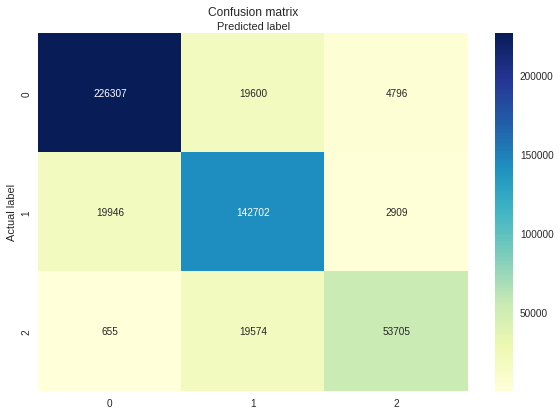

In [ ]:
# Testing the model using a confusion matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots()

# Create heatmap

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label = "positive", average = "micro"))
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label = "positive", average = "micro"))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Precision: 0.8623402163225172
Recall: 0.8623402163225172
Accuracy: 0.8623402163225172


#### Discussion

Before actually elaborating a model, we defined the three tip categories: no tip, low tip and high tip. We decided that a low tip would be a tip below the average and a high tip would be above average. However, when calculating that average, we considered that we should exclude the cases where tip=0: since there are inumerous cases where the client gave no tip, calculating the average considering those cases would give us a really low average value. Therefore, we decided to calculate the average considering only the tip values higher than zero. After performing that calculation, we were able to create two new columns in the dataframe: one with the tip_category expressed in a number and other with a string variable explaining what that number means, considering that 1 = "No tip", 2 = "Low tip" and 3 = "High tip". 

After that, we predicted the tip category using a Logistic Regression Classifier. First, we created a variable with our features (the variables we want to use in order to predict the tip category), which is the variable X, and the target variable, which is the tip category itself. 

To understand model performance, we divided the dataset into a training set and a test set, train_test_split(). After, we just had to fit your model on the train set using fit() and perform prediction on the test set using predict() - with all of this, we finally had our model created. Therefore, we proceded to a model evaluation using a confusion matrix.

By looking at the confusion matrix, we can reach some conclusions: our model succesfully predicted a tip being zero 226307 times, accurately predicted a tip being a low tip 142702 times, and accurately predicted a tip being a high tip 53705 times. 

We can also take conclusions from the 4 squares on the bottom right of the confusion matrix: those 4 squares point out the number of times that the model accurately predicted that there would be in fact a tip, but failed to predict if it would be high or low: therefore, those 4 numbers are the numbers of true negatives. 

Besides that, it was also relevant calculate some other values to evaluate our model:

- Precision: shows us how precise/accurate our model is. The number reflects out of those predicted positive, how many of them are actual positive.
- Recall: model metric we use to select our best model when there is a high cost associated with False Negative.
- Accuracy: metric that describes how the model performs across all classes. It is useful when all classes are of equal importance. It is calculated as the ratio between the number of correct predictions to the total number of predictions.

## Exercise 3

The third question intends to help taxi drivers to decide to which area of the city they should go next. To this end, we could have a web site/mobile app where the drivers could check the best area at a given moment. To support such application efficiently, it would be necessary to have a pre-computed index with the value for each area and period of time (e.g. combining the week day and a period of one hour). 

You should create the program to create such index. The output tuples should be something like: longitude latitude day_of_week hour value.

Define your own metric for the value of an area. Parameters that may be included in such metric include: the number of pickups in the area, the amount collected in the trip, the average time a taxi is idle in the area, etc.

Besides presenting the code, explain the rationale of your solution.

**Note:** SQL functions date(col), dayofweek(col) and hour(col) return, respectively, the date, day of week and hour of a datatime in column col.

Data with the parameters identified bellow:

In [ ]:
# Locations by (1) number of trips, (2) average amount collected, (3) average idle time and (4) percentage of trips paid in cash grouped by hour and day of the week
parameters1 = spark.sql("""SELECT pickup_longitude, pickup_latitude, dayofweek(pickup_datetime) AS pickup_dayofweek,
                     hour(pickup_datetime) AS pickup_hour, count(*) AS TripCount, round(mean(total_amount), 2) AS Avg_TotalAmount,
                     -- calculation iddle time
                     int(mean(CASE
                          WHEN trip_time_in_secs > 3600 THEN 0
                          ELSE 3600 - trip_time_in_secs
                     END)) AS Avg_IdleTime,
                     -- calculation percentage of trips paid in cash
                     round(mean(CASE
                          WHEN payment_type = 'CSH' THEN 100
                          ELSE 0
                     END), 2) AS PercentageCash FROM data 
                     GROUP BY pickup_longitude, pickup_latitude, pickup_dayofweek, pickup_hour
                     ORDER BY TripCount DESC""")
parameters1.createOrReplaceTempView("parameters1")
parameters1.show()

+----------------+------------------+----------------+-----------+---------+---------------+------------+--------------+
|pickup_longitude|   pickup_latitude|pickup_dayofweek|pickup_hour|TripCount|Avg_TotalAmount|Avg_IdleTime|PercentageCash|
+----------------+------------------+----------------+-----------+---------+---------------+------------+--------------+
|      -73.973783|40.756288039999994|               4|         19|      878|          12.34|        2965|         46.13|
|      -73.985755| 40.76077959599999|               4|         22|      838|          12.28|        2991|         54.42|
|      -73.973783| 40.76077959599999|               4|         19|      831|          12.55|        2952|          42.0|
|      -73.973783|40.756288039999994|               4|         20|      816|          12.24|        3024|         34.93|
|      -73.973783|40.756288039999994|               4|         21|      809|          13.28|        2993|         25.22|
|      -73.973783|40.75628803999

New columns with the rating for each parameter, calculated using percentiles.

In [ ]:
parameters = spark.sql("""SELECT *, NTILE (5) OVER (ORDER BY TripCount) AS rat_TripCount,
                            NTILE (5) OVER (ORDER BY Avg_TotalAmount) AS rat_Avg_TotAmount,
                            NTILE (5) OVER (ORDER BY Avg_IdleTime DESC) AS rat_Avg_IdleTime,
                            NTILE (5) OVER (ORDER BY PercentageCash) AS rat_PercentageCash FROM parameters1""")

parameters.createOrReplaceTempView("parameters")

parameters = spark.sql("""SELECT *,
                          ((rat_TripCount + rat_Avg_TotAmount + rat_Avg_IdleTime + rat_PercentageCash) / 4) AS metric FROM parameters ORDER BY metric DESC""")

parameters.createOrReplaceTempView("parameters")

parameters.show()

+----------------+------------------+----------------+-----------+---------+---------------+------------+--------------+-------------+-----------------+----------------+------------------+------+
|pickup_longitude|   pickup_latitude|pickup_dayofweek|pickup_hour|TripCount|Avg_TotalAmount|Avg_IdleTime|PercentageCash|rat_TripCount|rat_Avg_TotAmount|rat_Avg_IdleTime|rat_PercentageCash|metric|
+----------------+------------------+----------------+-----------+---------+---------------+------------+--------------+-------------+-----------------+----------------+------------------+------+
|      -73.788217| 40.64849069599999|               5|         16|       49|          51.47|        1213|         57.14|            5|                5|               5|                 4|  4.75|
|      -73.782231| 40.64399913999999|               1|         13|       48|          53.78|        1766|         60.42|            5|                5|               5|                 4|  4.75|
|      -73.788217| 4

In [ ]:
dayofweek = input("Please insert a day of the week: ")
hour = input("Please insert an hour: ")
print("\n")

param_output = spark.sql("""SELECT * FROM parameters
                            WHERE pickup_dayofweek = """ + dayofweek + """ AND pickup_hour = """ + hour)
param_output.createOrReplaceTempView("param_output")
param_output = spark.sql("""SELECT pickup_longitude, pickup_latitude, rat_TripCount, rat_Avg_TotAmount, rat_Avg_IdleTime, rat_PercentageCash, metric FROM param_output""")

print("For the day of the week " + dayofweek + " and hour " + hour + ", these are the best locations ordered by metric:")
param_output.show()

Please insert a day of the week: 5
Please insert an hour: 16


For the day of the week 5 and hour 16, these are the best locations ordered by metric:
+----------------+------------------+-------------+-----------------+----------------+------------------+------+
|pickup_longitude|   pickup_latitude|rat_TripCount|rat_Avg_TotAmount|rat_Avg_IdleTime|rat_PercentageCash|metric|
+----------------+------------------+-------------+-----------------+----------------+------------------+------+
|      -73.872021| 40.77425426399999|            5|                5|               5|                 4|  4.75|
|      -73.782231| 40.64399913999999|            5|                5|               5|                 4|  4.75|
|      -73.788217| 40.64849069599999|            5|                5|               5|                 4|  4.75|
|      -73.788217| 40.64399913999999|            5|                5|               5|                 3|   4.5|
|      -73.878007| 40.77425426399999|            4|        

**Explain the rationale of your solution, your code and discuss results**

For this exercise, we created a metric that includes four parameters: (1) number of trips, (2) average amount collected, (3) average idle time and (4) percentage of trips paid in cash. The first three are the suggested ones, while the last one we added to give users the locations where they can get liquidity, with payments in cash. As requested, we present values for each location (longitude + latitude), day of the week and hour of the day.

The user of the website should input the day of the week and hour of the day requested, and the app will retrieve the locations ordered by the highest metric values, which are the average of the four parameters' rating. Each rating goes from 1 to 5, and we get those by computing the percentile in which each column fits. The final metric is also in a scale from 1 to 5.

We still give users the option to see the ratings of each one of the four parameters. This way, if a user is looking for locations where one specific parameter is well-rated, he can check the first location with a rating 5 in the rat_ column of that parameter, that may not be the first row. The code can also be easily changed to order values by one the parameters' ratings.

## Exercise 4

The fourth question intends to help define the location of taxi ranks (the places where taxis stop waiting for collecting clients) in a way that tries to minimize the distance a client needs to travel to reach the taxi rank.

Consider that you want to establish, at least, 100 taxi ranks but no more than 150 - present the code that defines the number and locations of the ranks.

**Note:** This dataset is for NYC taxis. So, pickups outside of the city are infrequent and not representative of the demand in such areas. As such, you should focus on pickups in a square that includes NYC (it is ok if the square includes parts outside of the city). Use, for example, the following square:
```
northLatitude = 40.86
southLatitude = 40.68
eastLongitude = -74.03
westLongitude = -73.92
```

**Suggestion:** Plot your results as a heatmap, with the color being a measurement of the value of the taxi rank; use the visual feedback to enhance your solution.

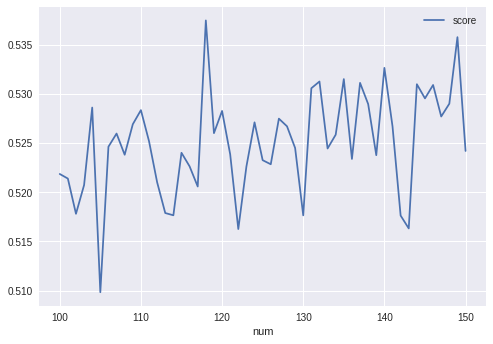

In [ ]:
# Squares of 150 meters
latitudeStep = 0.0013474668
longitudeStep = 0.001798
northLatitude = 40.95
southLatitude = northLatitude - 300 * latitudeStep
eastLongitude = -74.2
westLongitude = eastLongitude + 300 * longitudeStep

# function to round longitude to a point in the middle of the square
def longiRound( val):
    return ((val - eastLongitude) // longitudeStep) * longitudeStep + eastLongitude + longitudeStep / 2
spark.udf.register("longround", longiRound, DoubleType())

# function to round latitude to a point in the middle of the square
def latRound( l):
    return northLatitude - ((northLatitude - l) // latitudeStep) * latitudeStep - latitudeStep / 2
spark.udf.register("latround", latRound, DoubleType())

dataset = spark.read.load(FILENAME, format="csv", sep=",", schema=mySchema, header="false")

# filter data outside of the box and build a grid

dataset.createOrReplaceTempView("data")

filteredDataDF = spark.sql( """SELECT medallion, hack_license, pickup_datetime,
                                    dropoff_datetime, trip_time_in_secs, trip_distance,
                                    longround(pickup_longitude) AS pickup_longitude, 
                                    latround(pickup_latitude) AS pickup_latitude,
                                    longround(dropoff_longitude) AS dropoff_longitude, 
                                    latround(dropoff_latitude) AS dropoff_latitude, 
                                    payment_type, fare_amount, mta_tax, 
                                    tip_amount, tolls_amount, total_amount
                                  FROM data
                                  WHERE pickup_longitude >= """ + str(eastLongitude) + """ AND
                                  pickup_longitude <=  """ + str(westLongitude) + """ AND
                                  dropoff_longitude >=  """ + str(eastLongitude) + """ AND
                                  dropoff_longitude <=  """ + str(westLongitude) + """ AND
                                  pickup_latitude <= """ + str(northLatitude) + """ AND
                                  pickup_latitude >= """ + str(southLatitude) + """ AND
                                  dropoff_latitude <=  """ + str(northLatitude) + """ AND
                                  dropoff_latitude >=  """ + str(southLatitude))

filteredDataDF.createOrReplaceTempView("data")

dataset.createOrReplaceTempView("data")

# Select only the zone of NYC

dataset = spark.sql( "SELECT * FROM data WHERE pickup_latitude >= 40.68 AND pickup_latitude <= 40.86 AND pickup_longitude >= -74.03 AND pickup_longitude <= -73.92")

assembler = VectorAssembler(inputCols=('pickup_longitude','pickup_latitude'),outputCol="features")
dataset = assembler.transform(dataset)


def evaluate(dataset, k):
    kmeans = KMeans().setK(k).setSeed(1)
    model = kmeans.fit(dataset)
    predictions = model.transform(dataset)
    evaluator = ClusteringEvaluator()
    evaluator.setPredictionCol("prediction")
    score = evaluator.evaluate(predictions)
    return score

# For each value from 100 to 150 compute the clusters and the score
df = pd.DataFrame(columns=['num','score'])

dataset.cache()

for i in range(100,151):
    df = pd.concat([df,pd.Series({"num": i, "score": evaluate(dataset,i)}).to_frame().T], ignore_index=True)

# Plot the scores    
df.plot( x="num", y="score")


In the plot above, we can see the quality we have for each number of taxi ranks. There is clearly a maximum quality we can achieve. Therefore, we have to calculate which number of ranks it corresponds to.

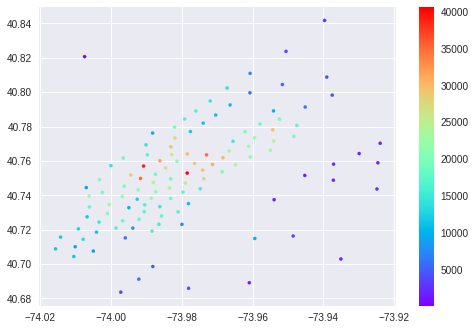

In [ ]:
#k = int(df.nlargest(1,"score")["num"].values[0])
# by running the code commented above, we see that the number of taxi ranks that allows us to achieve the maximum quality is 118. 

# Training KMeans

kmeans = KMeans().setK(118).setSeed(1) #used 118 because that's the value of k, calculated above

model = kmeans.fit(dataset)

#center of each cluster, and storing those centers in a df

centers = model.clusterCenters()

centers_df = pd.DataFrame(np.vstack(centers), columns=["longitude", "latitude"])
centers_df["index_cluster"]=centers_df.index
centersDF = spark.createDataFrame(centers_df)
centersDF.createOrReplaceTempView("centers_cluster")

# Assign each element to one of the clusters we have

predictions = model.transform(dataset)

predictions.createOrReplaceTempView("predictions")

#Group the predictions

center_count = spark.sql("""SELECT prediction,

                            COUNT(*) AS cnt

                            FROM predictions

                            GROUP BY prediction

                            ORDER BY prediction DESC""")

center_count.createOrReplaceTempView("center_count")

df = spark.sql("""SELECT longitude, latitude, cnt

                    FROM centers_cluster

                    INNER JOIN center_count

                    ON centers_cluster.index_cluster = center_count.prediction""")

stand = df.collect()

#Plot centers of each cluster

p = plt.scatter([row.longitude for row in stand],

            [row.latitude for row in stand],

            c=[row.cnt for row in stand],s=10,cmap="rainbow")

plt.colorbar(p)

plt.show()

In [ ]:
# Now, let's see what the location of each taxi rank is (the centers of the clusters)

centers = model.clusterCenters()
print("Cluster Centers (location of the taxi ranks): ")
for center in centers:
    print(center)

Cluster Centers (location of the taxi ranks): 
[-73.98351083  40.74424981]
[-73.99081953  40.75696816]
[-73.95430787  40.77814817]
[-73.94853781  40.71630486]
[-73.99860885  40.72094072]
[-73.98821253  40.6985689 ]
[-73.97380253  40.74964776]
[-73.97922099  40.78431719]
[-74.00612091  40.73323863]
[-73.94835152  40.77422363]
[-73.96554771  40.77133746]
[-73.9775776   40.77705366]
[-73.96838468  40.76185441]
[-73.98648427  40.7231356 ]
[-73.9607641   40.79962547]
[-73.99628048  40.74522015]
[-73.98285352  40.76367502]
[-73.98621846  40.73337881]
[-73.98194914  40.77334828]
[-73.97965669  40.74180156]
[-74.00678002  40.7274942 ]
[-73.97847865  40.75290555]
[-73.9906427   40.73043079]
[-73.9959688   40.71522684]
[-73.93966715  40.84170907]
[-74.01053368  40.70437257]
[-73.93713174  40.75808691]
[-74.00789326  40.71434343]
[-73.95498516  40.7661931 ]
[-73.97813857  40.73512747]
[-73.98738885  40.74202944]
[-73.97997678  40.72305563]
[-74.00005016  40.75725346]
[-73.97302757  40.7634815 ]
[

The code cell above defines the clusters we have, and plots them so that we have a better image of them. Each color represents a cluster.

#### Discussion

For this task, we started by building a grid composed of squares of 150m, assigning each coordinates to each square, following the same rationale as in question 1. Besides that, we had to exclude the data that does not refer to New York city, using a square defined by the longitudes and latitudes given to us in the beggining. To achieve that, we had to select all the data from the dataset whose coordinates respect those borders, which is done in the first cell of this resolution. 

Our main goal is to define the number and locations of taxi ranks that minimizes the distace that each client needs to travel to get to a taxi rank. That number of ranks is located between 100 and 150. Therefore, we created a function **evaluate** that for each number of existing taxi ranks, evaluates the quality score achieved. Then, we only needed to create a **for** cicle that iterates through 100 to 150, which lead us to the conclusion that the optimal number of taxi ranks is 118 (result of using **nlargest** to determine the number of taxi ranks with a higher quality, which appears in the beggining of the second cell).

After determining the number of ranks, we needed to define the location of each, which is found by calculating the center of each cluster (train K-means and display the centroids). 

The plotted heat map allows us to use a visual feedback to enhance our compreehension of the solution. In that plot, each point represents a cluster center (which corresponds to a taxi rank location). 

In conlusion, we should have 118 taxi ranks in order to minimize the distance that each person travels to get to a rank. By running the last cell in the resolution of this exercise, we can see the location of those: each coordinate represents one of those squared of 150 meters that we defined in the begining, more specifically the centroids of those.


## Exercise 5

Propose a problem that you think would be useful to solve with the given dataset.

**Explain the problem you propose to solve**

For this exercise, we will create a model to help investors get a simulation of the financial requirements to enter the taxi business in New York. We will provide a breakdown on costs and revenues based only on 2 inputs: (1) the number of taxis the investor will acquire and use, and (2) the number of months we should consider for the financial plan.

The inputs we are considering include the average price in 2022 of a NY medallion, which for the first time since 2014 got a price increase compared to the previous year. We are also considering as fixed costs the monthly salary of each driver and the price of a standard car to be used as a taxi, in this case the newest model of the Toyotta Corolla. As variable costs, there is a bonus that can be attributed to all drivers if the total revenues surpass a certain value determined bellow, the money spent on gas (gas prices, car fuel consumption for city driving) and average car maintenance. The values of these inputs can be changed in the cell bellow, and are comproved by the sources identified.

In [ ]:
# Fixed costs
medallion = 137330 # source: https://www.chauffeurdriven.com/news-features/in-this-issue/3408-in-depth-with-daus-rising-medallions-could-be-good-news-for-all-nyc-transportation.html
min_driver_salary = (26500 / 12) # source: https://mint.intuit.com/salary/taxi-driver/ny
car_price = 21550 # Toyota Corolla 2023 price in the US ; source: https://www.toyota.com

# Variable costs
extra_percentage = 0.01 # ... 1% of revenue (extra salary) for monthly revenue over ...
min_monthly_revenue = 40000
avg_miles_per_gallon = 35 # 6.7 liters per 100 kms
gas_price_per_gallon = 3.74 # price on December 2, 2022 ; source: https://gasprices.aaa.com/state-gas-price-averages/
avg_maintenance_cost_per_mile = 0.09 # source: https://www.thebalancemoney.com/average-car-maintenance-cost-4775765



After creating variables for these inputs, we are now filtering the original dataset with locations only from New York, and getting the sum of the trips' fare amount (revenue), tolls amount (cost) and total trip distances in miles, aggregated on medallion and pick up day of the month.

In [ ]:
dataset = spark.sql("SELECT * FROM data WHERE pickup_latitude >= 40.68 AND pickup_latitude <= 40.86 AND pickup_longitude >= -74.03 AND pickup_longitude <= -73.92")
dataset.createOrReplaceTempView("dataset")

dataset_5 = spark.sql("""SELECT medallion, day(pickup_datetime) AS pickup_day,
                         sum(fare_amount) AS sum_fare_amount,
                         sum(tolls_amount) AS sum_tolls_amount,
                         round(sum(trip_distance), 2) AS sum_trip_distance FROM dataset
                         GROUP BY medallion, pickup_day ORDER BY sum_fare_amount DESC""")

dataset_5.createOrReplaceTempView("dataset_5")
dataset_5.show()

+--------------------+----------+---------------+------------------+-----------------+
|           medallion|pickup_day|sum_fare_amount|  sum_tolls_amount|sum_trip_distance|
+--------------------+----------+---------------+------------------+-----------------+
|73BE6BEB430FF5D08...|         1|          913.5|               0.0|           231.61|
|90666ADD2A1A29EF5...|         1|          833.5|               9.6|           211.03|
|0B3D3D51C78E944F6...|         1|          823.5|               0.0|           209.11|
|300359B4AF7FDCF05...|         1|         823.02|             10.25|            199.7|
|2DA12E2776B48AB3C...|         1|          817.5|              19.2|           213.81|
|67BF305970B8C8584...|         1|          817.5|              25.3|           211.79|
|47C97FA74B6645204...|         1|          814.0|             15.05|           214.61|
|F6159237810614D81...|         1|          811.5|              25.2|           223.69|
|079E2EE80E3CFA17E...|         1|          

Now, we can get the average monthly fare amount, tolls amount and trip distance per taxi in New York, multiplying the daily values (grouped by day, as we don't have data of a complete month) by 30 days.

In [ ]:
dataDF_5 = dataset_5.toPandas()
avg_monthly_fare_amount = dataDF_5["sum_fare_amount"].mean() * 30
avg_monthly_tolls_amount = dataDF_5["sum_tolls_amount"].mean() * 30
avg_monthly_trip_distance = dataDF_5["sum_trip_distance"].mean() * 30

In [ ]:
# Function that calculates one time fixed costs, monthly variable cost and revenue based on number of taxis
def calc_fixed_cost_monthly_variable_cost_revenue(number_taxis):
  gas_cost = (avg_monthly_trip_distance / avg_miles_per_gallon) * gas_price_per_gallon * number_taxis
  maintenance_cost = avg_maintenance_cost_per_mile * avg_monthly_trip_distance * number_taxis
  total_revenue = avg_monthly_fare_amount * number_taxis
  
  # Check if there is bonus for drivers
  if total_revenue > min_monthly_revenue:
    bonus_drivers = total_revenue * extra_percentage
  else:
    bonus_drivers = 0
  
  fixed_cost = number_taxis * (medallion + car_price)
  variable_cost = number_taxis * (min_driver_salary + avg_monthly_tolls_amount) + gas_cost + maintenance_cost + bonus_drivers
  return gas_cost, maintenance_cost, bonus_drivers, total_revenue, fixed_cost, variable_cost

Here we get the required inputs and present the outputs proposed in the beggining. The outputs are not rounded because the code " pyspark.sql.functions import * " overlap the round() python's native function with the round() spark function.

In [ ]:
n_taxis = int(input("Please insert your predicted number of taxis: "))
n_months = int(input("Please insert the number of months (higher than 1) for which you want to get the estimated profit: "))

(gas_cost, maintenance_cost, bonus_drivers, total_revenue, fixed_cost, variable_cost) = calc_fixed_cost_monthly_variable_cost_revenue(int(n_taxis))
profit = (n_months * total_revenue) - fixed_cost - (n_months * variable_cost)
print("\n")
print("Assuming the inputs identified in the beggining of the model and an average monthly fare amount per taxi of " + str(avg_monthly_fare_amount))
print("The estimated profit is " + str(profit))
print("The estimated revenue is " + str(n_months * total_revenue))
print("The estimated fixed costs are " + str(fixed_cost))
print("The estimated variable costs are " + str(n_months * variable_cost) + ", with costs in salaries of " + str(n_months * n_taxis * min_driver_salary) + ", with tolls costs of " + str(n_months * n_taxis * avg_monthly_tolls_amount) + ",\nwith gas costs of " + str(n_months * gas_cost) + ", with maintenance costs of " + str(n_months * maintenance_cost) + " and with bonus costs of " + str(n_months * bonus_drivers) + ".")


Please insert your predicted number of taxis: 5
Please insert the number of months (higher than 1) for which you want to get the estimated profit: 36


Assuming the inputs identified in the beggining of the model and an average monthly fare amount per taxi of 8237.082015915119
The estimated profit is 191891.60904439876
The estimated revenue is 1482674.7628647215
The estimated fixed costs are 794400
The estimated variable costs are 496383.1538203227, with costs in salaries of 397500.0, with tolls costs of 16467.658467122714,
with gas costs of 36688.231711150554, with maintenance costs of 30900.516013402204 and with bonus costs of 14826.747628647216.


#### Discussion

The model we present can be used to help investors decide the number of taxis they want to acquire, better predict when they can make profit out of the investment, and how much. This can be done by inserting a certain number of taxis and the number of months for which they want a financial plan.

We assume the cars and medallion become property of the investors, and are therefore purchased for the full price in which they are today for sale. The car chosen, a Toyota Corolla, is very common in the US. Other inputs like the drivers salary, gas prices and estimated maintenance costs were retrived from the identified sources. The average fuel consumption was an assumption on our part for city driving. We also incorporated in the model a bonus that would be given to drivers when the monthly revenue of the company is above a certain value defined in the inputs. In this scenario, a percentage of the revenue (also defined in the inputs) would be distributed to the drivers.

Following the code and explanations above, investors get an overview of the estimated monthly revenues, total revenue estimated during the months inserted, estimated costs (divided by fixed and variable) and estimated profit.